In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})



In [2]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,tool,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,6.140000,0.002610,0.001090,12.900000,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.590000,0.001080,0.001090,3.200000,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.070000,0.003190,0.001210,2.500000,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.430000,0.001180,0.001210,7.500000,False,False,True
4,GENIE3,kidney collecting duct principal cell,10.910000,0.005000,0.001390,1.400000,True,True,True
...,...,...,...,...,...,...,...,...,...
79,scPRINT-full,endothelial cell,2.121755,0.001084,0.000890,64.285714,False,False,False
80,scPRINT-mean,endothelial cell,0.657581,0.001366,0.001289,36.363636,True,False,True
81,scPRINT-mean,endothelial cell,6.338245,0.005163,0.001289,9.090909,True,True,True
82,scPRINT-class,endothelial cell,0.492976,0.001111,0.001289,9.090909,True,False,True


In [5]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
res = res.rename(columns={'TF_only': 'Format'})

KeyError: 'TF_only'

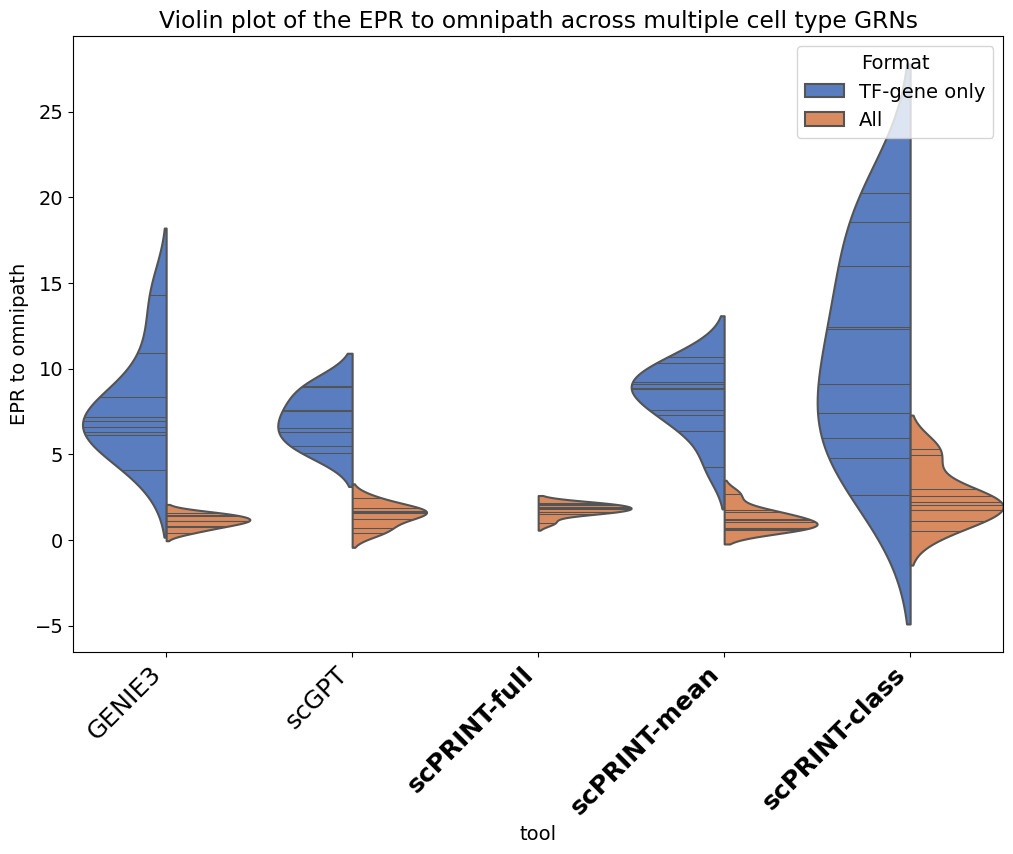

In [8]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to omnipath across multiple cell type GRNs')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to omnipath')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 1:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()


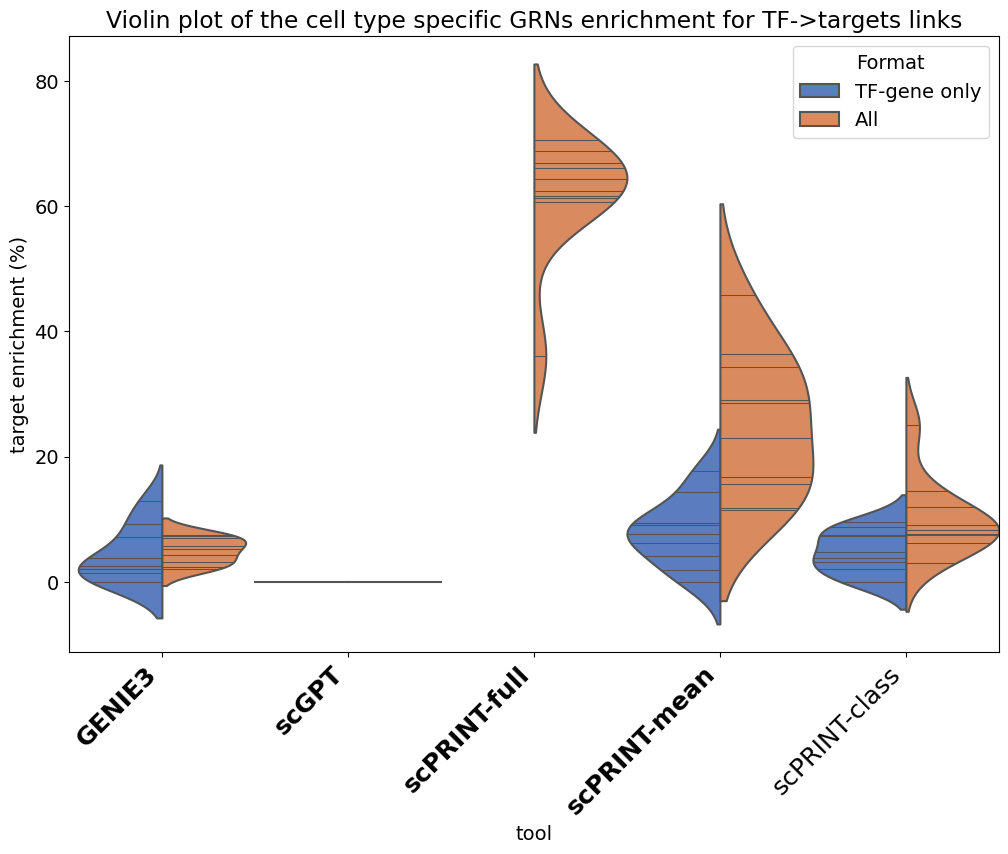

In [9]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='tool', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the cell type specific GRNs enrichment for TF->targets links')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('target enrichment (%)')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)
# Show the plot
plt.show()

In [10]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

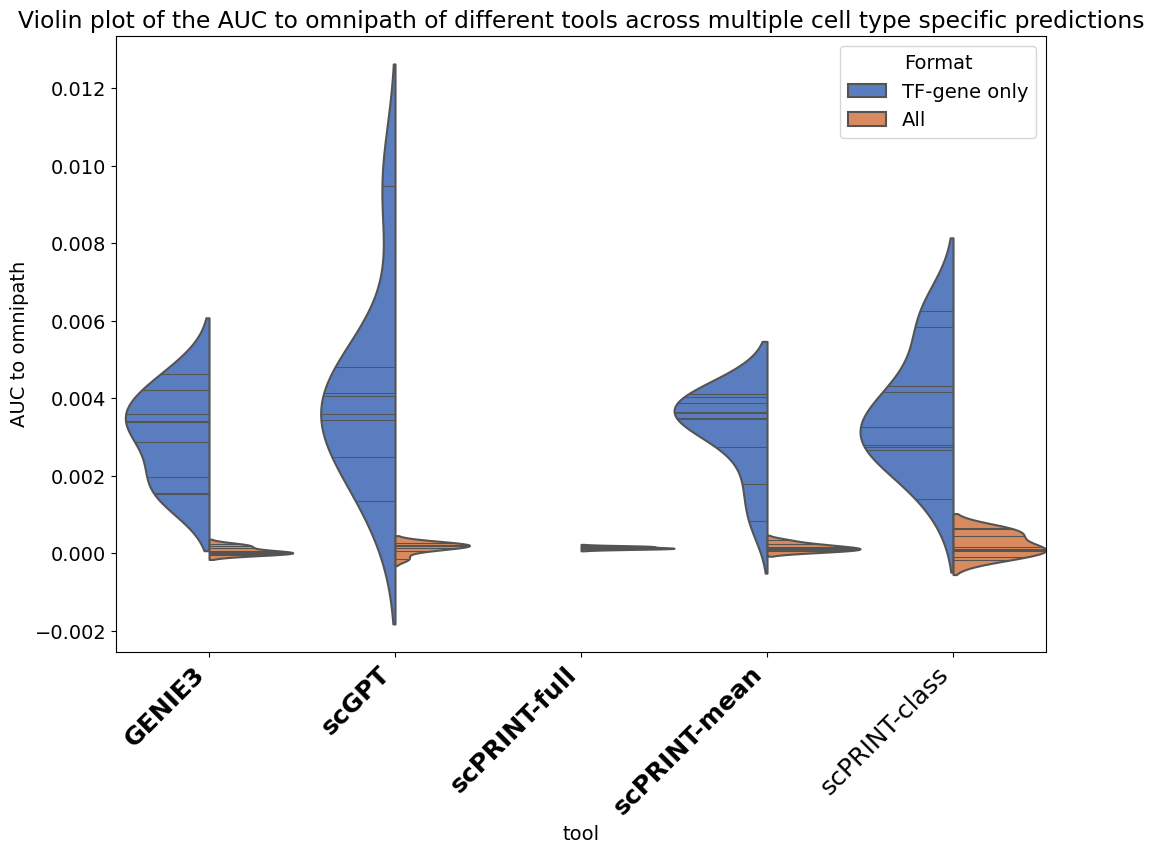

In [11]:
# Create the violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the AUC to omnipath of different tools across multiple cell type specific predictions')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('AUC to omnipath')

# Rotate the x labels for better readability and increase their size
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i < 4:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=45, ha="right", fontsize=18)

# Show the plot
plt.show()

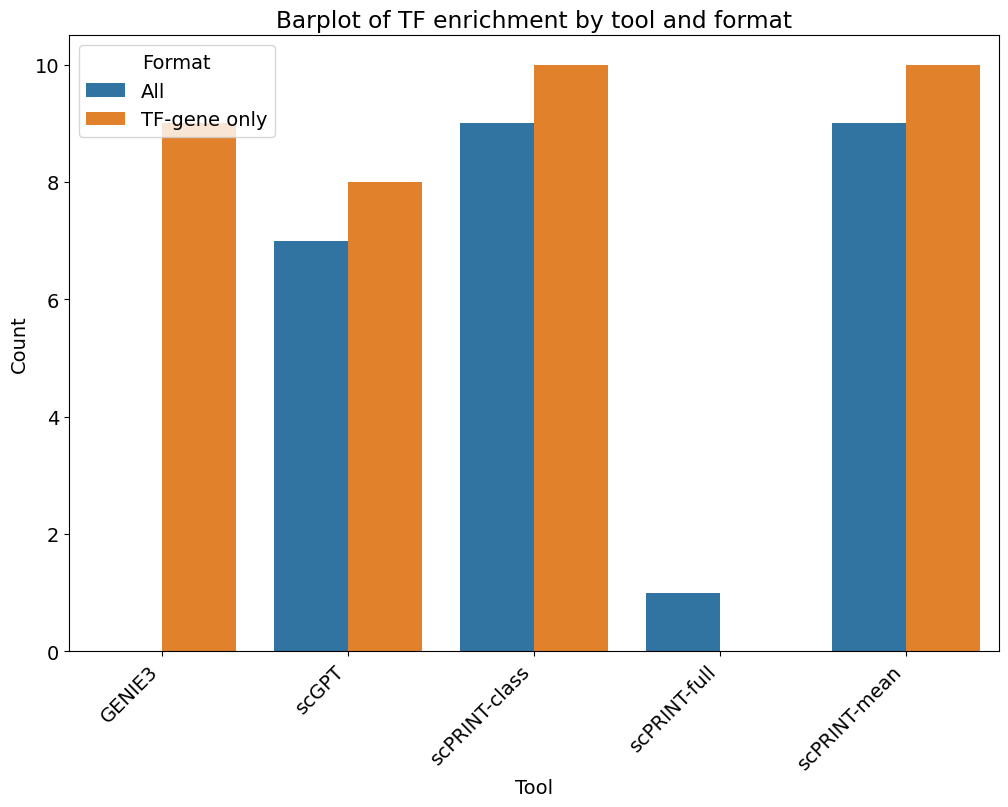

In [15]:
# Count the number of TF_enr and celltype
tf_enr_count = res.groupby(['tool', 'Format'])['TF_enr'].sum().reset_index()
celltype_count = res.groupby(['tool', 'Format'])['celltype'].sum().reset_index()

# Create a new DataFrame for plotting
count_data = pd.merge(tf_enr_count, celltype_count, on=['tool', 'Format'], suffixes=('_TF_enr', '_celltype'))

# Create the barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y="TF_enr", hue='Format', data=count_data)

# Set the title and labels of the plot
bar_plot.set_title('Barplot of TF enrichment by tool and format')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


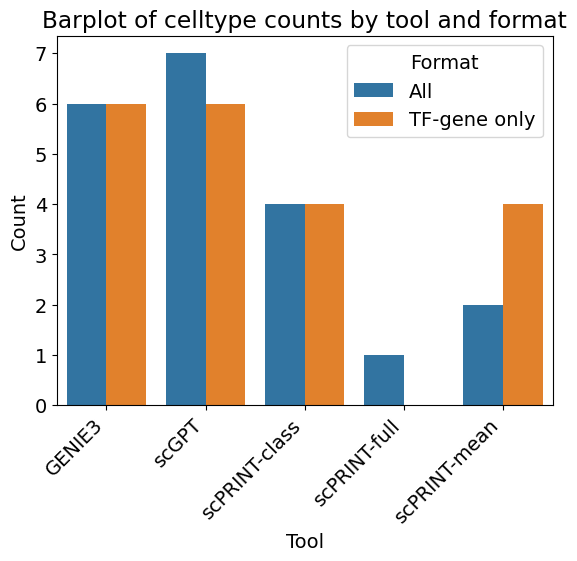

In [14]:
bar_plot = sns.barplot(x='tool', y="celltype", hue='Format', data=count_data)

# Set the title and labels of the plot
bar_plot.set_title('Barplot of celltype counts by tool and format')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('Count')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [87]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,genie3,han,1.44,0.0292,0.0274,False
1,genie3,han_chip,1.21,0.2766,0.2537,False
2,genie3,han_ko,1.12,0.0775,0.0766,True
3,genie3,han,1.12,0.0775,0.0766,True
4,genie3,han_chip,0.78,0.2621,0.2537,True
5,genie3,mine,2.17,0.0282,0.0247,True
6,genie3,mine,1.09,0.0286,0.0247,False
7,genie3,tran,1.22,0.0424,0.0405,True
8,genie3,tran_chip,1.48,0.2291,0.1989,True
9,genie3,tran_ko,0.98,0.0824,0.0796,True


In [122]:
res['name'] = res['name'].replace({'mine':'ours'})

/local/scratch/tmp/ipykernel_3167849/2152278390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


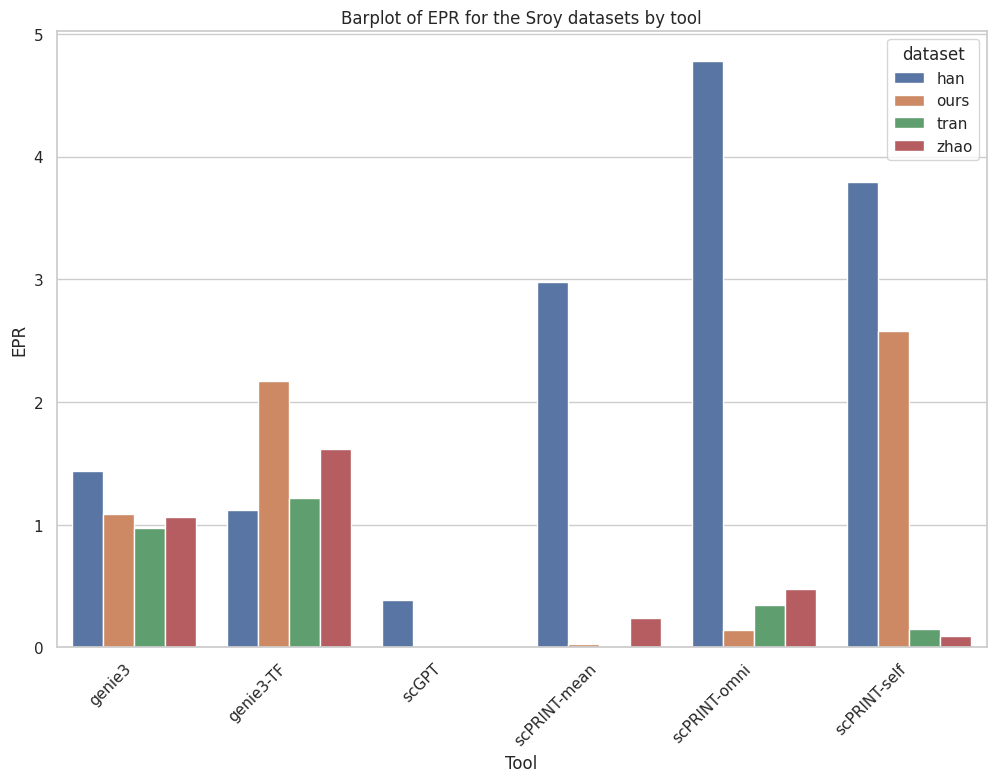

In [123]:
filtered_res = res[res['name'].isin(['han','ours','tran', 'zhao'])]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='EPR').reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'))

# Set the title and labels of the plot
bar_plot.set_title('Barplot of EPR for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('EPR')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


/local/scratch/tmp/ipykernel_3167849/951922680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


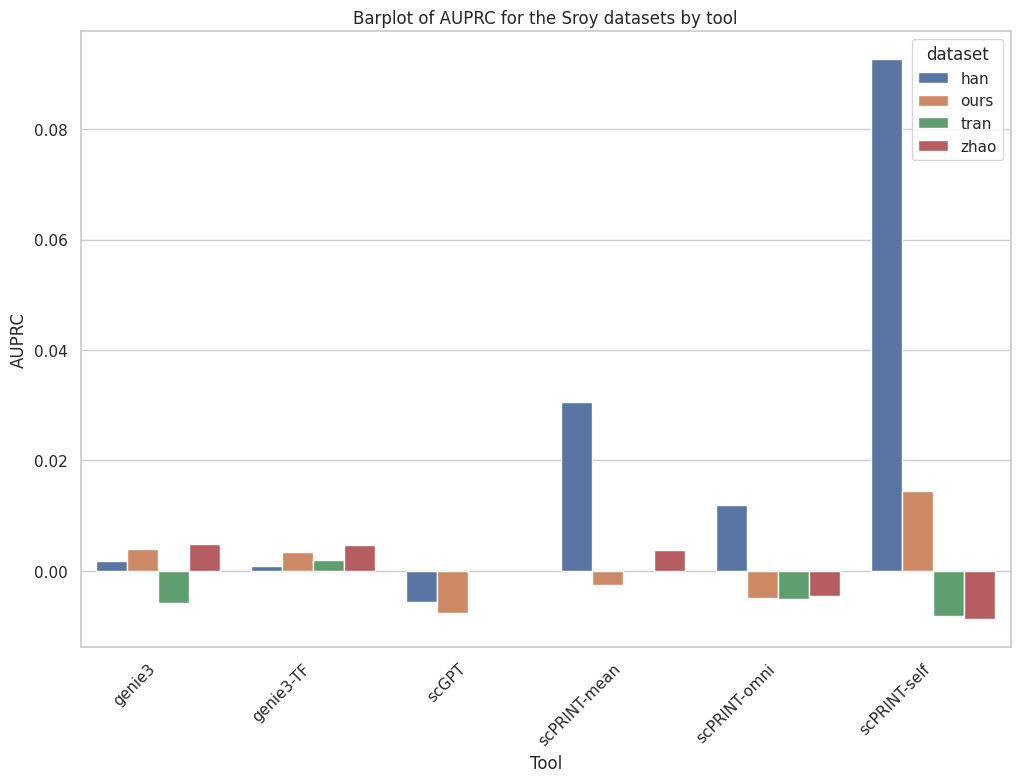

In [124]:
filtered_res = res[res['name'].isin(['han','ours','tran', 'zhao'])]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='AUPRC').reset_index()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'))

# Set the title and labels of the plot
bar_plot.set_title('Barplot of AUPRC for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

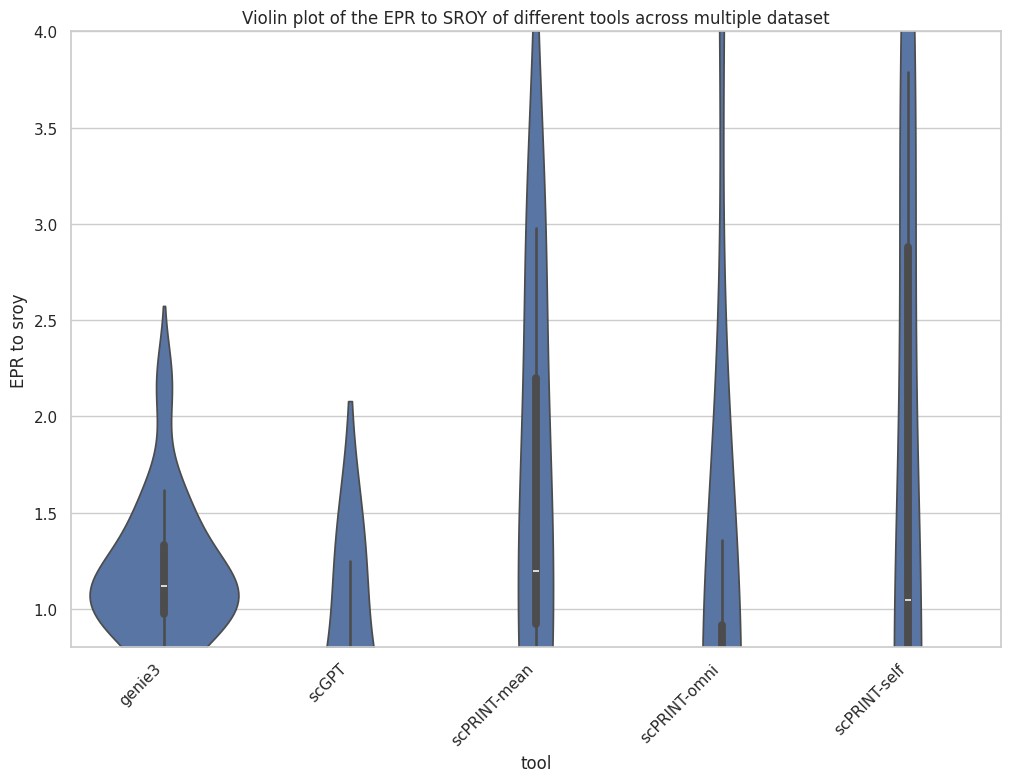

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the violin plot with a focus on the 0.8 - 4 range for the y-axis
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='EPR', data=res)
violin_plot.set_ylim(0.8, 4)  # Setting the y-axis limits to focus on the 0.8 - 4 range

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to SROY of different tools across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('EPR to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [111]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

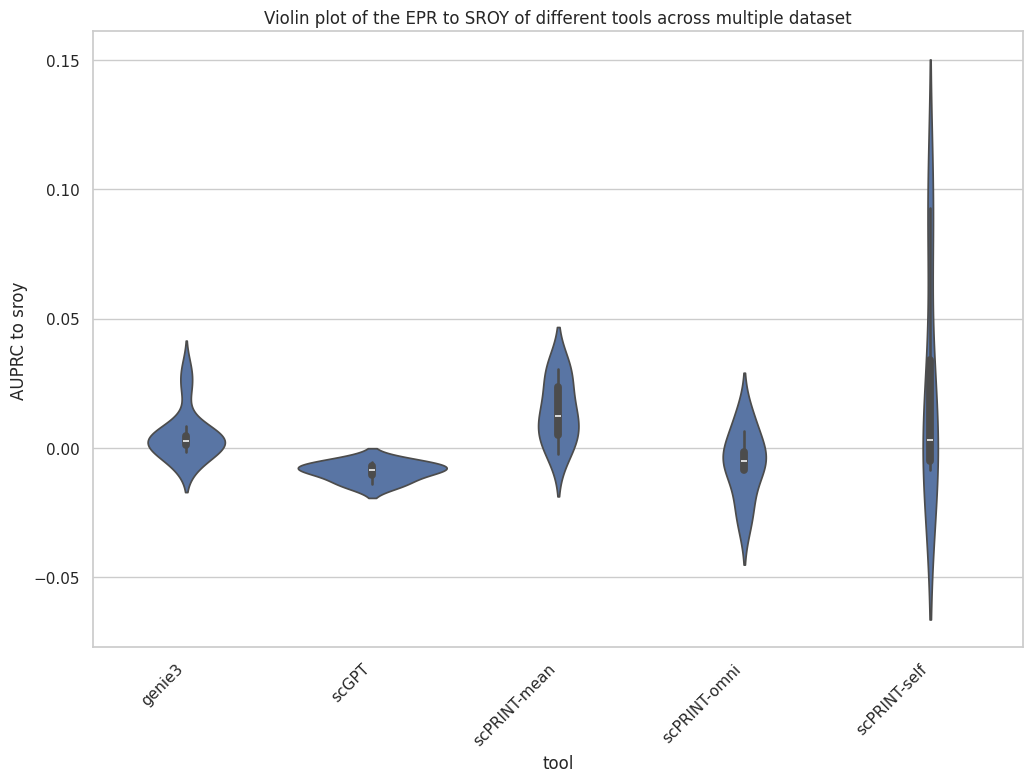

In [113]:
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='tool', y='AUPRC', data=res)

# Set the title and labels of the plot
violin_plot.set_title('Violin plot of the EPR to SROY of different tools across multiple dataset')
violin_plot.set_xlabel('tool')
violin_plot.set_ylabel('AUPRC to sroy')

# Rotate the x labels for better readability and align them
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [93]:
mat = pd.read_csv('data/other.tsv', sep="\t")
mat

,dataset,metrics,scGPT,GENIE3,scPRINT,scPRINT-class,GENIE3-TF
0,GWPS,TF_enr,1.0,1,1,1.0,NaN
1,GWPS,TF_target_enr,7.8,11,11,22.6,11.0
2,GWPS,celltype_pred,0.0,0,0,1.0,0.0
3,SROY LIU,TF_enr,1.0,1,1,1.0,NaN
4,SROY LIU,TF_target_enr,4.5,0,2,25.0,2.0
5,SROY LIU,celltype_pred,1.0,1,1,1.0,1.0


In [29]:
# Reshape the dataframe 'mat' to have the last four columns as one column with labels as rows
mat_melted = mat.melt(id_vars=mat.columns[:2], value_vars=mat.columns[2:], var_name='tools', value_name='value')
# Display the reshaped dataframe
mat_melted


,dataset,metrics,tools,value
0,GWPS,TF_enr,scGPT,1.0
1,GWPS,TF_target_enr,scGPT,7.8
2,GWPS,celltype_pred,scGPT,0.0
3,SROY LIU,TF_enr,scGPT,1.0
4,SROY LIU,TF_target_enr,scGPT,4.5
5,SROY LIU,celltype_pred,scGPT,1.0
6,GWPS,TF_enr,GENIE3,1.0
7,GWPS,TF_target_enr,GENIE3,11.0
8,GWPS,celltype_pred,GENIE3,0.0
9,SROY LIU,TF_enr,GENIE3,1.0


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'tools': ['genie3', 'scGPT', 'scPRINT', 'scPRINT-omni', 'scPRINT-self'],
    'EPR': [4.68, 0.99, 2.81, 4.70, 1.61],
    'AUPRC': [0.00188, 0.00208, 0.00170, 0.00189, 0.00190],
    'RAND': [0.00163, 0.00163, 0.00161, 0.00161, 0.00161],
    'TF_targ': [17.9, 14.0, 8.6, 3.4, 5.0],
    #'TF_enr': [True, True, True, True, True],
    #'TF_only': [False, False, False, False, False],
    #'ct_pred': [False, False, False, False, False]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert boolean columns to integers for plotting

# Set the index to 'tools'
df.set_index('tools', inplace=True)

# Plot the normalized heatmap with a more rectangular shape
plt.figure(figsize=(12, 5))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=False, linewidths=.5, fmt='.2f', norm=plt.Normalize(df.min(), df.max()))
# Customize the plot
plt.title('Tool Performance Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

ValueError: can only convert an array of size 1 to a Python scalar

<Figure size 1200x500 with 0 Axes>